# IOD- MINI PROJECT - 2

**Business Context**

The insurance company is experiencing increasing costs for health insurance, which is leading to a reduction in revenue. This trend is unsustainable and requires strategic intervention.

**Identification of the Problem**

An evaluation of the cost data reveals that claims for health insurance are rising, with a significant proportion of these claims related to heart condition treatments. This trend highlights the need for targeted solutions to manage and mitigate these costs.

**Problem Analysis**

To reduce costs effectively, the company must develop a strategy to adjust premiums for clients at higher risk of heart attacks. Implementing a robust method to accurately identify and assess these high-risk clients is crucial.

**Solution**

Develop and deploy a machine learning model to identify clients who are prone to heart attacks. This model will be integrated into the company's pricing strategy to ensure that premiums reflect the individual risk profiles, thereby helping to manage costs more effectively.





**Data source**

*Heart Disease data set- UCIrvine Machine Learning Repository*

## Data Sourcing and EDA

In [1]:
#Fetching required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import roc_curve, auc,f1_score

In [2]:
#Reading the data
df= pd.read_csv(r"C:\Users\user\Downloads\archive (6)\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Feature Information**
1) age - Age
2) sex - Gender (Male/Female)
3) cp - Chest pain type (-- Value 1: typical angina, -- Value 2: atypical angina, -- Value 3: non-anginal pain, -- Value 4: asymptomatic4 values)
4) trestbps - Resting blood pressure
5) chol - Serum cholestoral in mg/dl
6) fbs - Fasting blood sugar > 120 mg/dl
7) restecg - Resting electrocardiographic results (values 0,1,2)
8) thalach - Maximum heart rate achieved
9) exang -  Exercise induced angina
10) oldpeak - ST depression induced by exercise relative to rest
11) slope - The slope of the peak exercise ST segment
12) ca - Number of major vessels (0-3) colored by flourosopy
13) thal: Blood disorder(Thalassemia) 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0 = less chance of heart attack 1= more chance of heart attack

In [3]:
#Size of the dataframe
df.shape

(303, 14)

In [4]:
#Checking for data types and presence of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Number of unique values in each column
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
#understanding the datset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#Finding key statistical information on each column
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#Checking for NAN values
has_nan = df.isna().any().any()
has_nan

False

In [9]:
#Checking for duplicates
df.duplicated().sum()

1

In [10]:
# Check domains and intervals
def check_domains_and_intervals(df):
    for col in df.columns:
        print(f"Column: {col}")
        if pd.api.types.is_numeric_dtype(df[col]):
            min_val = df[col].min()
            max_val = df[col].max()
            unique_vals = df[col].unique()
            print(f"  Type: Numeric")
            print(f"  Min: {min_val}, Max: {max_val}")
            print(f"  Unique values (if few): {unique_vals[:10]}")
            print(f"  25th Percentile: {df[col].quantile(0.25)}, 75th Percentile: {df[col].quantile(0.75)}")
        else:
            unique_vals = df[col].unique()
            print(f"  Type: Categorical")
            print(f"  Unique values: {unique_vals}")
        print()

In [11]:
check_domains_and_intervals(df)

Column: age
  Type: Numeric
  Min: 29, Max: 77
  Unique values (if few): [63 37 41 56 57 44 52 54 48 49]
  25th Percentile: 47.5, 75th Percentile: 61.0

Column: sex
  Type: Numeric
  Min: 0, Max: 1
  Unique values (if few): [1 0]
  25th Percentile: 0.0, 75th Percentile: 1.0

Column: cp
  Type: Numeric
  Min: 0, Max: 3
  Unique values (if few): [3 2 1 0]
  25th Percentile: 0.0, 75th Percentile: 2.0

Column: trestbps
  Type: Numeric
  Min: 94, Max: 200
  Unique values (if few): [145 130 120 140 172 150 110 135 160 105]
  25th Percentile: 120.0, 75th Percentile: 140.0

Column: chol
  Type: Numeric
  Min: 126, Max: 564
  Unique values (if few): [233 250 204 236 354 192 294 263 199 168]
  25th Percentile: 211.0, 75th Percentile: 274.5

Column: fbs
  Type: Numeric
  Min: 0, Max: 1
  Unique values (if few): [1 0]
  25th Percentile: 0.0, 75th Percentile: 0.0

Column: restecg
  Type: Numeric
  Min: 0, Max: 2
  Unique values (if few): [0 1 2]
  25th Percentile: 0.0, 75th Percentile: 1.0

Column:

<Axes: >

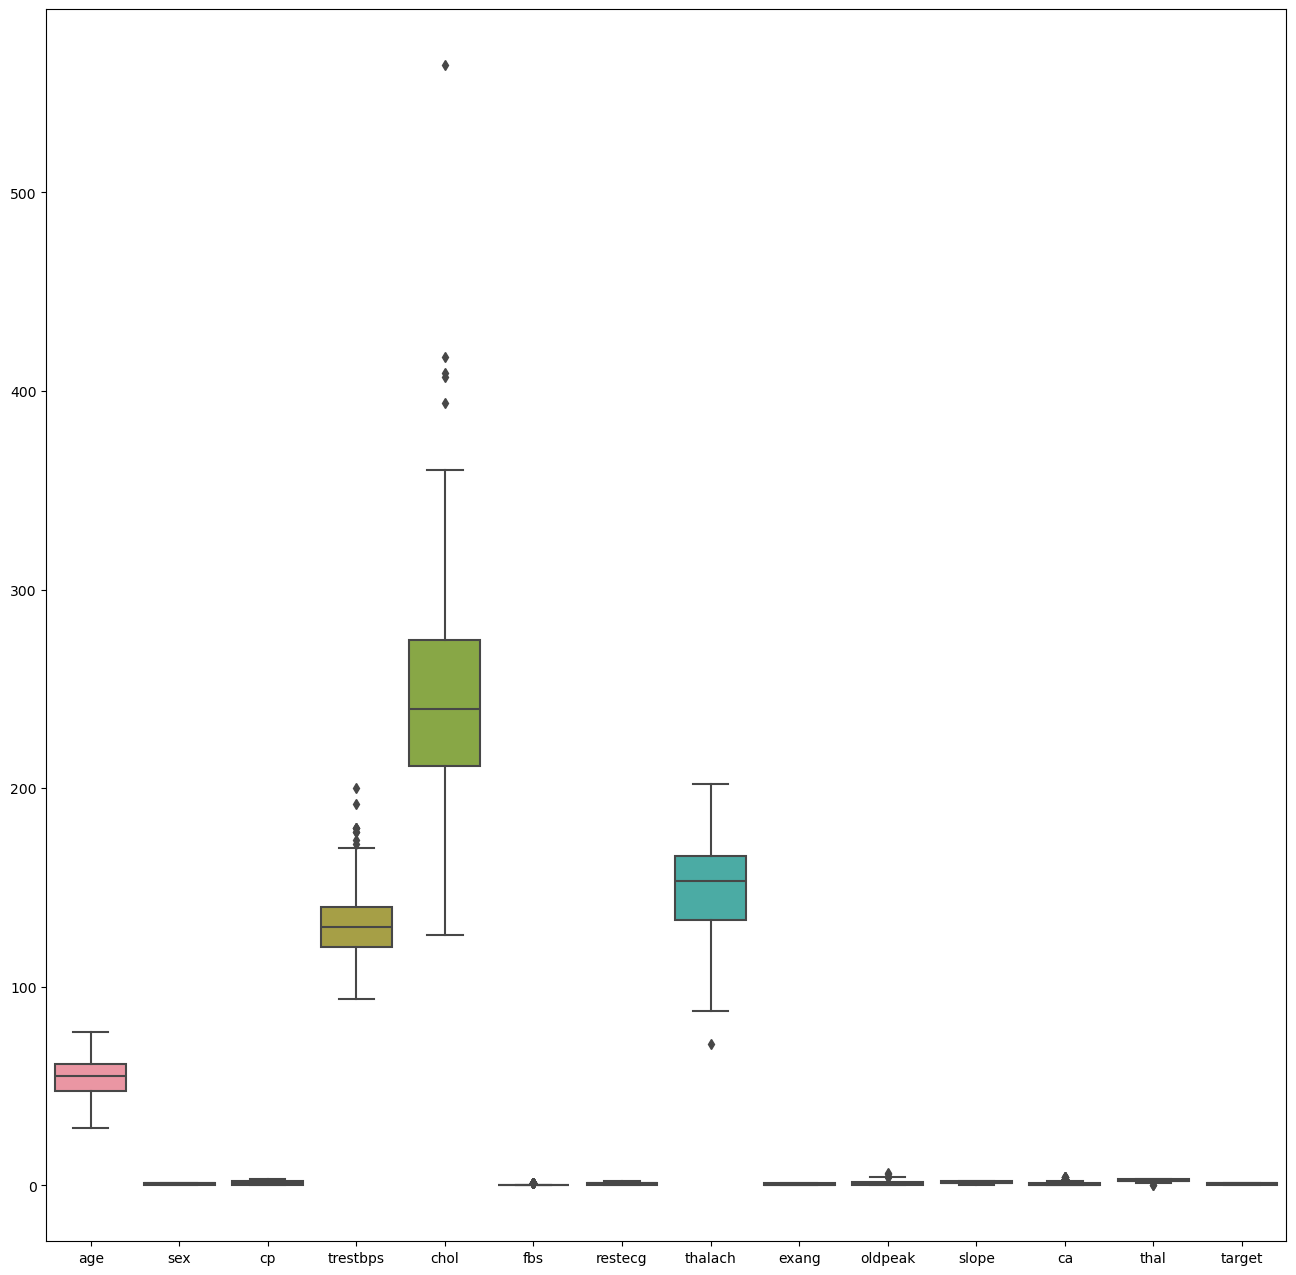

In [12]:
# Checking for outliers
plt.figure(figsize=(16,16))
sns.boxplot (data= df)


In [13]:
#Examining the outliers
# Columns to check for outliers
columns = ['trestbps', 'chol', 'thalach']

# Initialize an empty DataFrame to store outliers
outliers_df = pd.DataFrame()

for column in columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Append the outliers to the outliers_df
    outliers_df = pd.concat([outliers_df, column_outliers])

# Drop duplicates if the same row is an outlier in multiple columns
outliers_df = outliers_df.drop_duplicates()

# Display the outliers dataframe
outliers_df



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1


> By examining outliers dataframe, It is understood that even though they come as outliers, in real world it is still possible and it is not a mistake of the data collection. However considering the normal range of resting blood pressure, cholesterol and heart rate, I have decided to remove few extreme values based on following criteria. <br>
**Removing cholesterol more than 400, blood pressure more than 180 and heart rate less than 80 as those values are extreme and rare occurances.** <br>
Further I have **removed 1 duplicate** row.

In [14]:
# Checking the class distribution of target column
class_distribution = df['target'].value_counts()
class_proportion = df['target'].value_counts(normalize=True)

print("Class Distribution:")
print(class_distribution)

print("\nClass Proportion:")
print(class_proportion)

Class Distribution:
target
1    165
0    138
Name: count, dtype: int64

Class Proportion:
target
1    0.544554
0    0.455446
Name: proportion, dtype: float64


*Even though their is class imbalance, I'm not balancing it on this stage.*

In [15]:
# Check correlation of target
df_corr = df.corr()
df_corr["target"].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

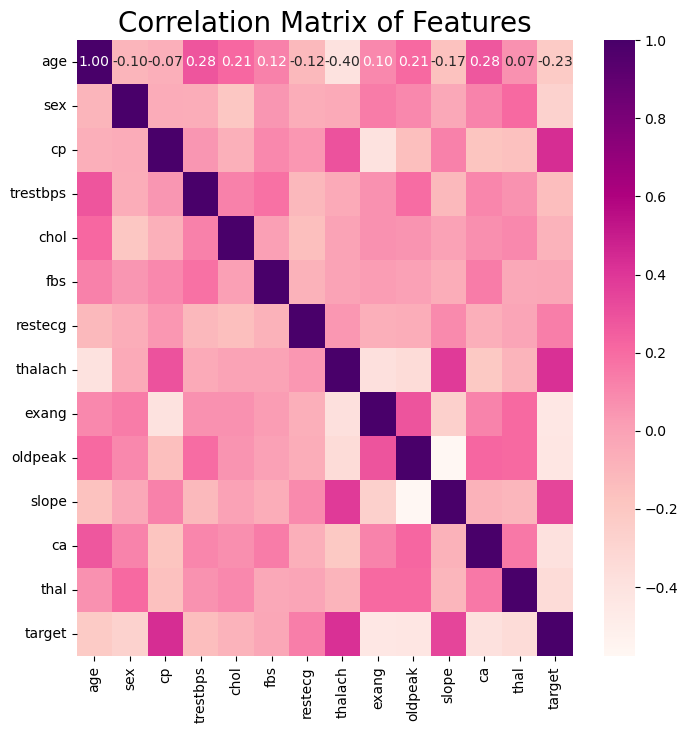

In [16]:
plt.figure(figsize = (8, 8))
sns.heatmap(df_corr, fmt = ".2f", annot = True, cmap = "RdPu")
# Add a title to the heatmap
plt.title('Correlation Matrix of Features', fontsize=20)
plt.show()

> Above Matrix shows that variables are not hugely correlated to each other. Also correlation with target column is also lower than 0.5 indicating that feature variables individually do not have significant influence to the target variable.

In [17]:
#Checking linearity on numerical columns
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Define a threshold for number of unique values to consider as categorical
threshold = 5

# Identify categorical and numerical columns based on unique values
categorical_cols = []
numerical_cols_final = []

for col in numerical_cols:
    unique_count = df[col].nunique()
    if unique_count <= threshold:
        categorical_cols.append(col)
    else:
        numerical_cols_final.append(col)

print("Categorical columns:")
print(categorical_cols)
print("\nNumerical columns:")
print(numerical_cols_final)
#sns.pairplot(df, hue='target')

Categorical columns:
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

Numerical columns:
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


C:\Users\user\anaconda3\envs\mini_project_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\envs\mini_project_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\envs\mini_project_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\envs\mini_project_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

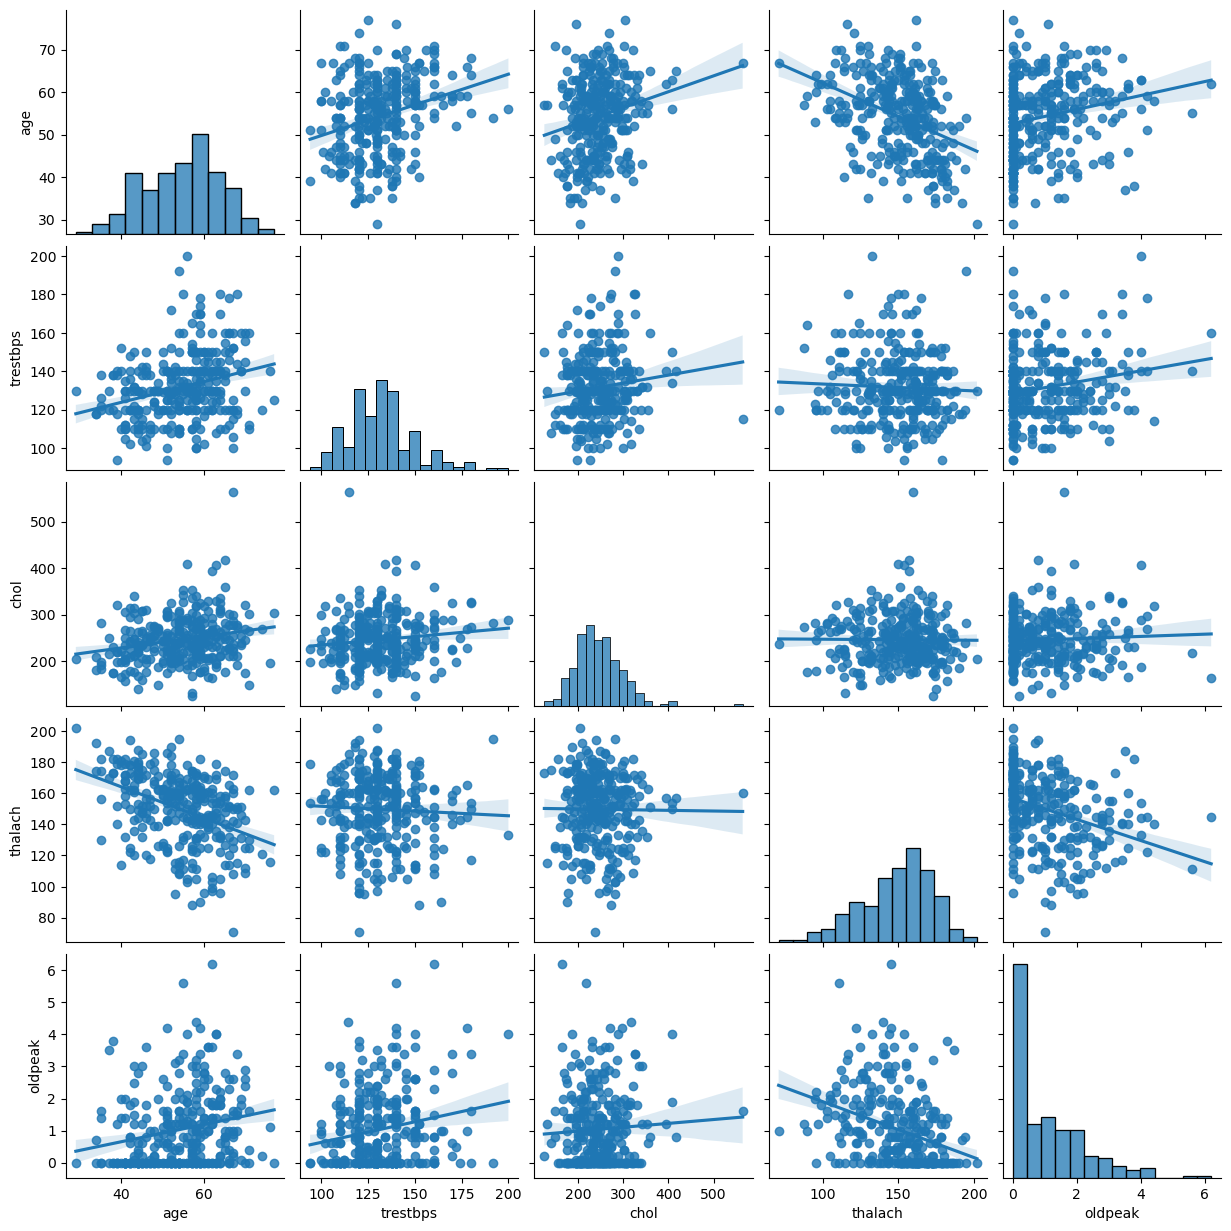

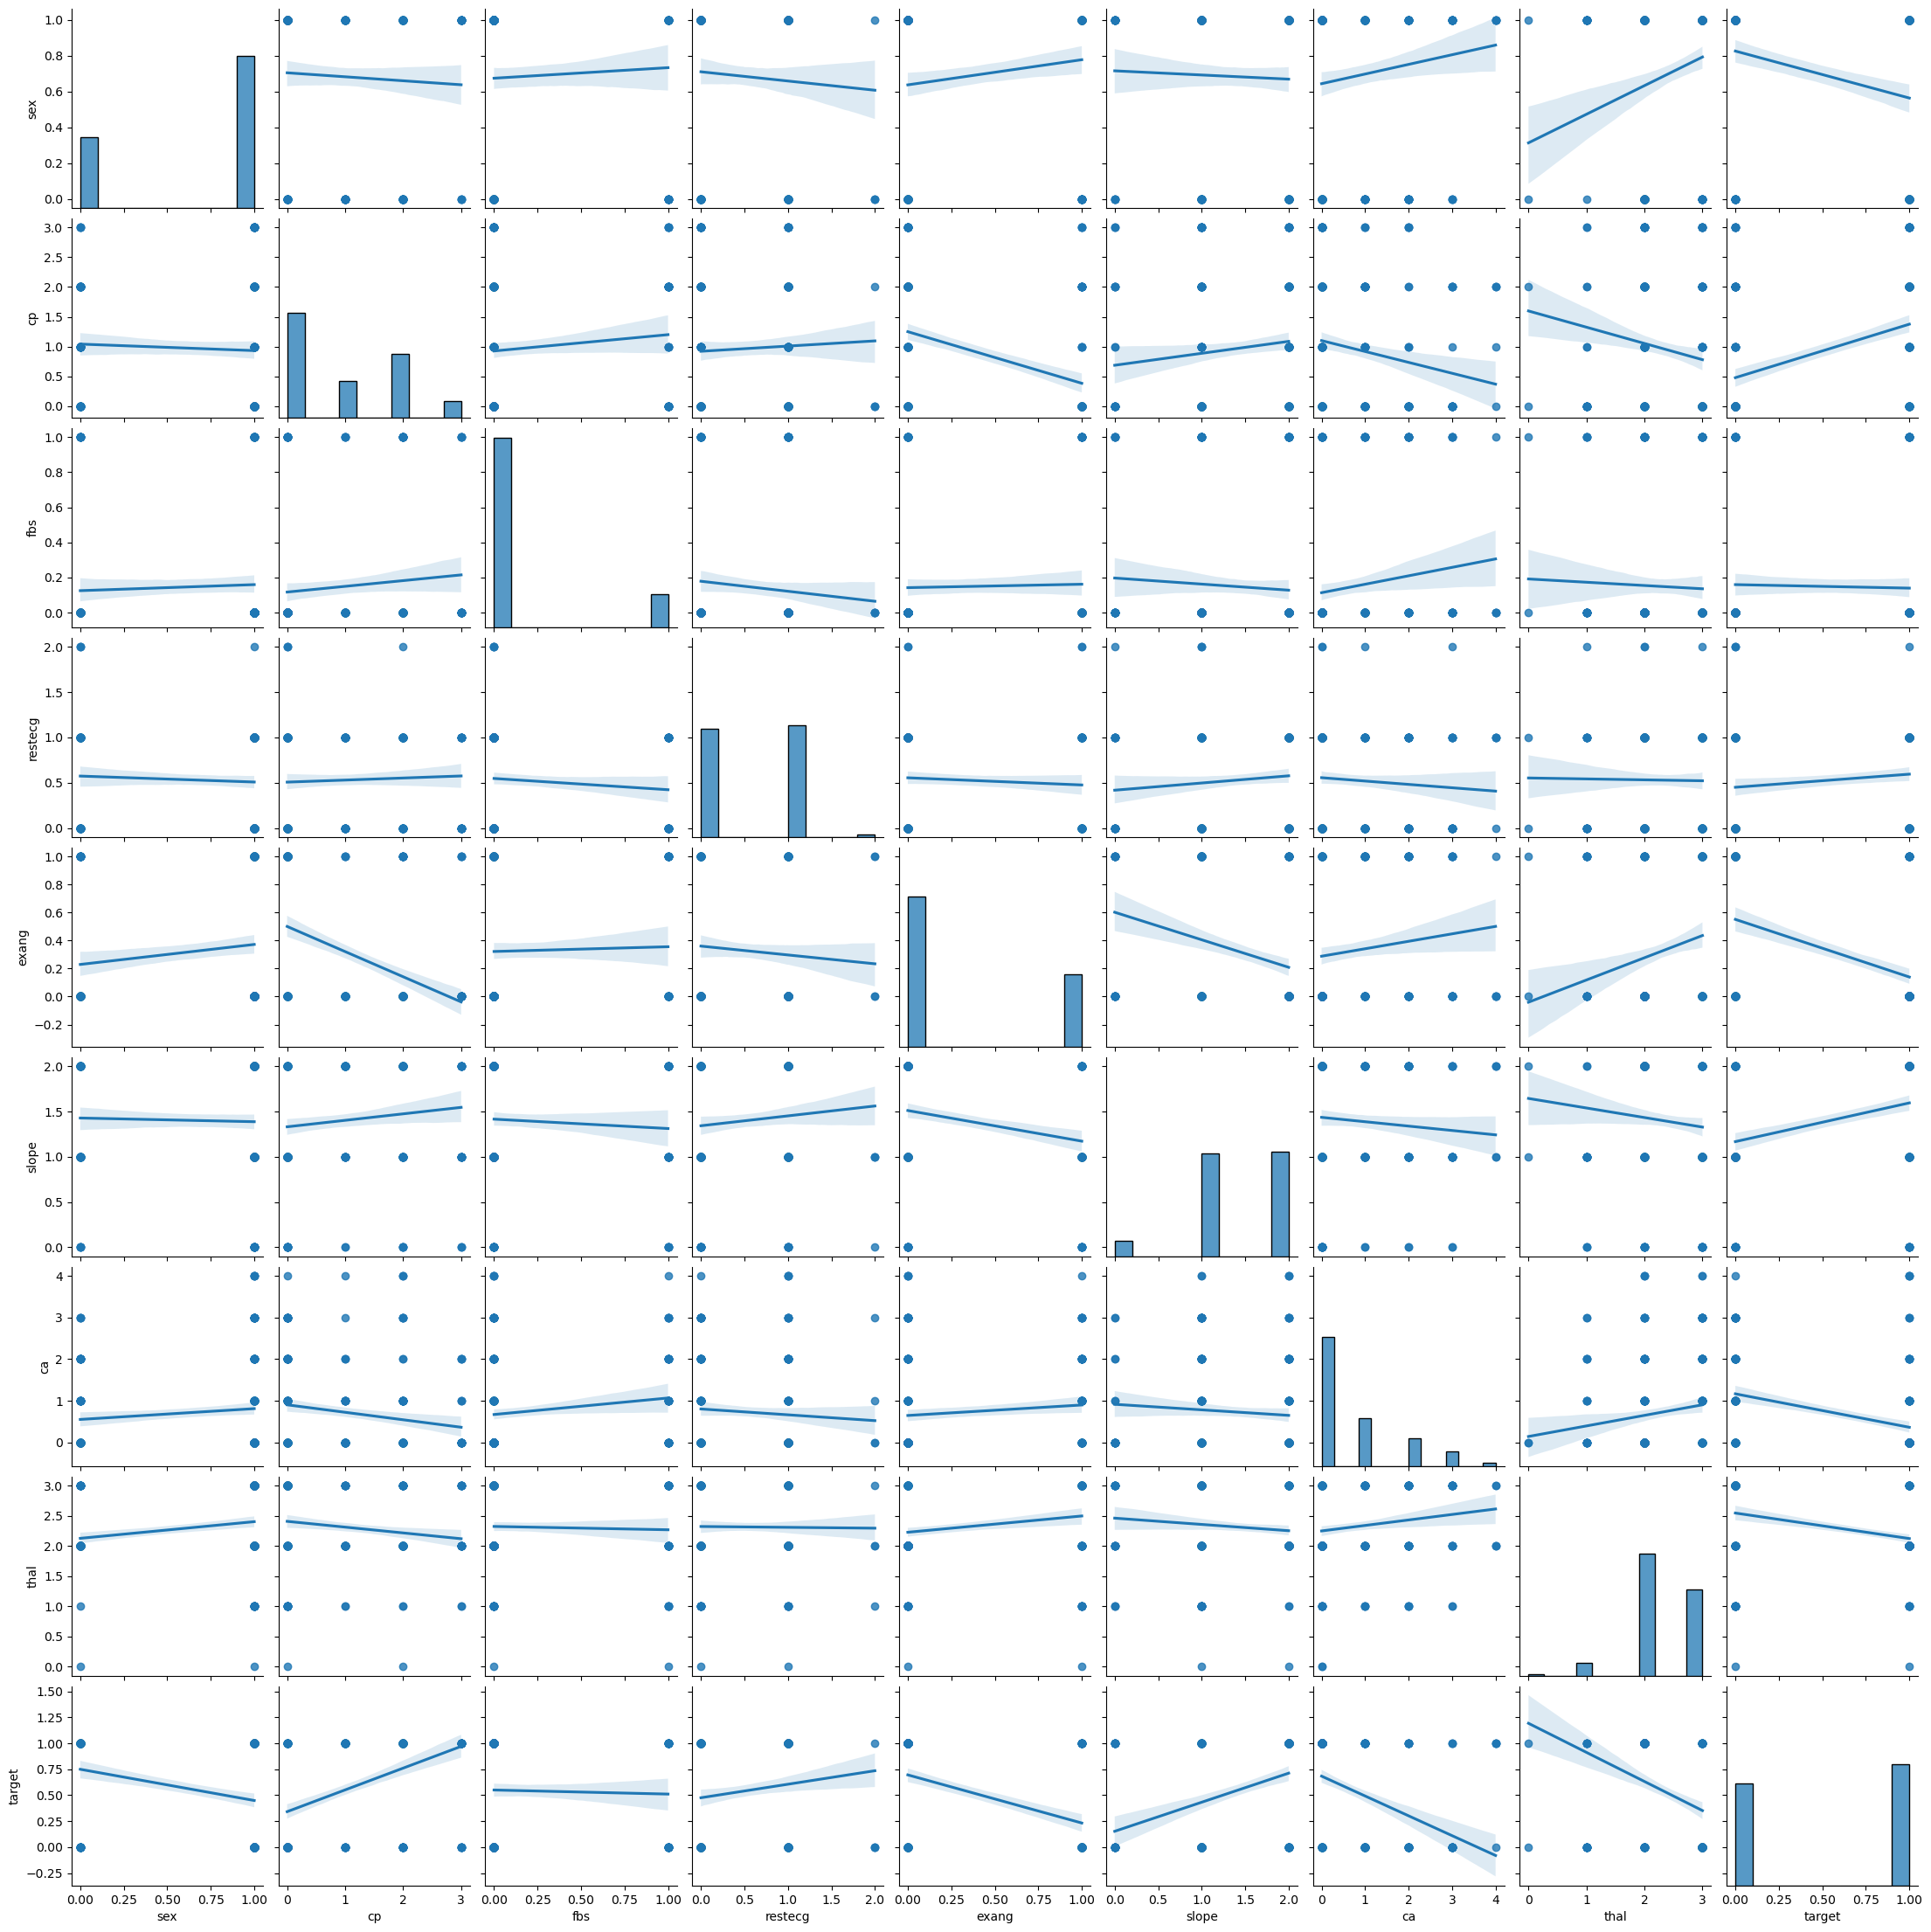

In [18]:
#Setting up a data frame with numerical columns
df_numeric = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
#Setting up a dataframe with categorical columns
df_categorical = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]

#Checking for linearity of numerical columns and categorical columns
sns.pairplot(df_numeric, kind='reg')
sns.pairplot(df_categorical, kind='reg')

> As per above some variables doesn't have any linearity at all. for instance oldpeak - chol, thalach-trestbps, thalach-chol.This signifies that combination of variables affecting the target variable.

## Cleaning the dataset

In [19]:
#Removing duplicates
df_cleaned=df.drop_duplicates() 

In [20]:
#Removing the outliers based on conditions identified in earlier stage
# Define filtering conditions
condition_chol = df_cleaned['chol'] <= 400
condition_trestbps = df_cleaned['trestbps'] <= 180
condition_thalach = df_cleaned['thalach'] >= 72

# Combine all conditions
combined_condition = condition_chol & condition_trestbps & condition_thalach

# Filter the DataFrame
df_cleaned_1 = df_cleaned[combined_condition]

# Display the shape of the original and cleaned DataFrame
print("Original DataFrame shape:", df_cleaned.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (302, 14)
Cleaned DataFrame shape: (302, 14)


<Axes: >

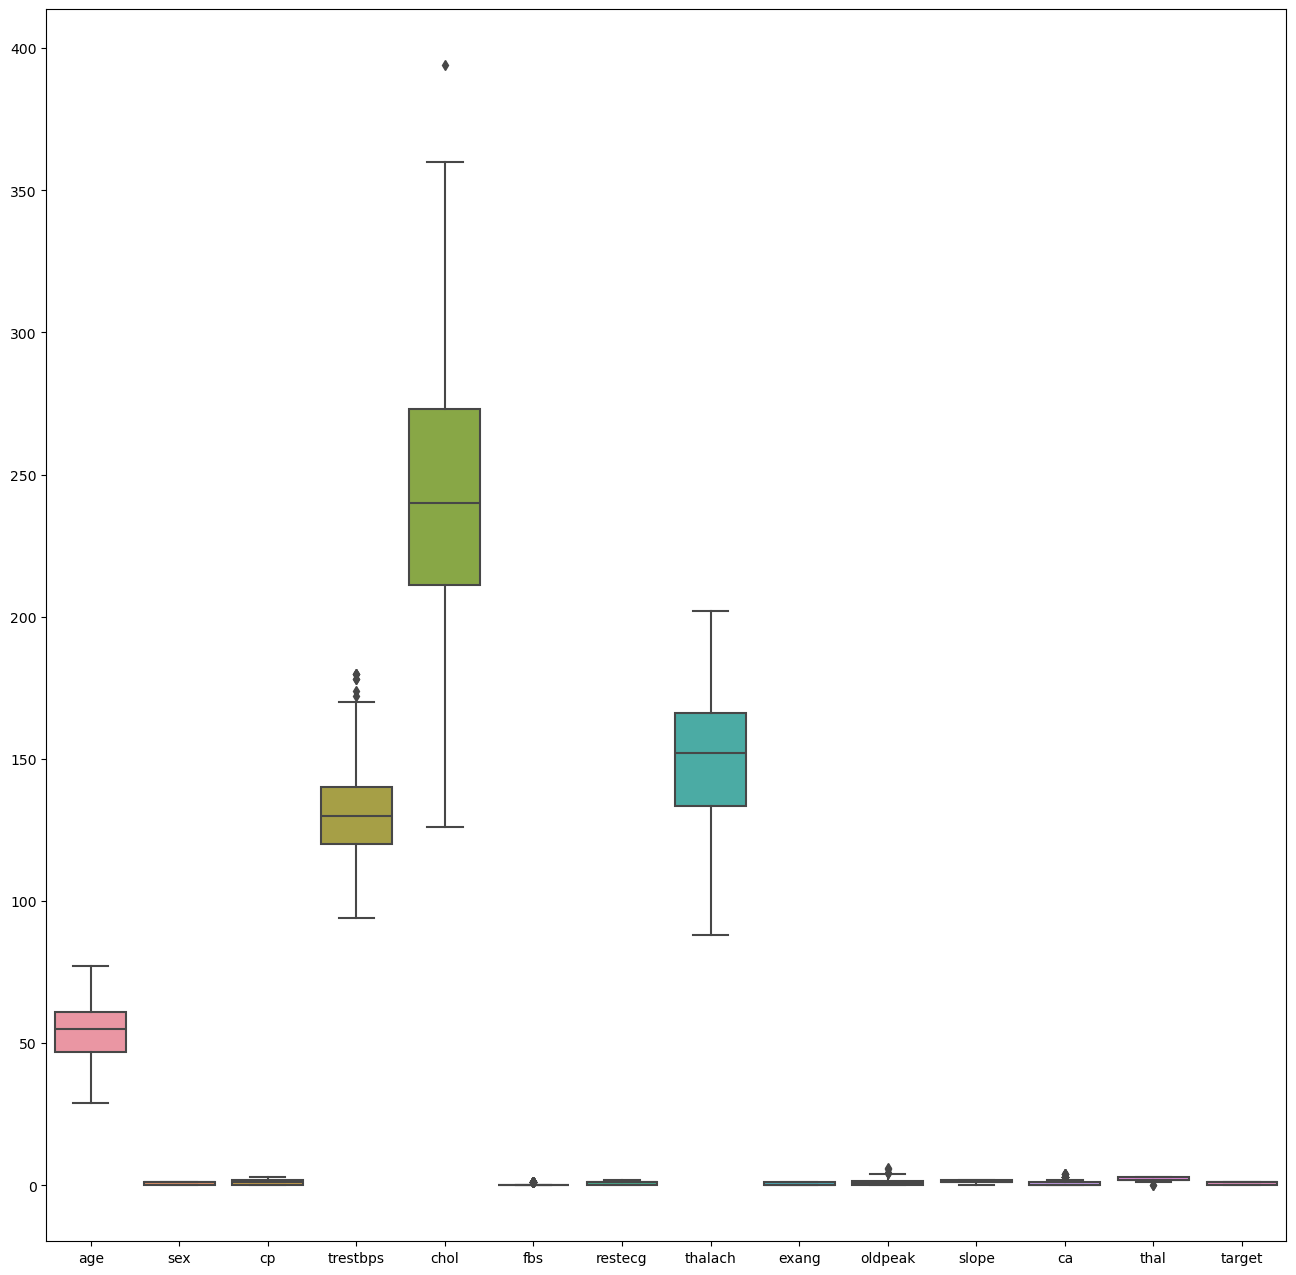

In [21]:
# Checking for outliers
plt.figure(figsize=(16,16))
sns.boxplot (data= df_cleaned_1)

In [22]:
# Class distribution after cleaning the dataframe
class_distribution_cleaned = df_cleaned_1['target'].value_counts()
class_proportion_cleaned = df_cleaned_1['target'].value_counts(normalize=True)

print("Class Distribution:")
print(class_distribution_cleaned)

print("\nClass Proportion:")
print(class_proportion_cleaned)

Class Distribution:
target
1    162
0    133
Name: count, dtype: int64

Class Proportion:
target
1    0.549153
0    0.450847
Name: proportion, dtype: float64


> **Difference** of class distribution has **reduced from 37 to 29** after **cleaning the data**, which will help for modeling.

## Pre-Processing the Data

Following codes used to scale the data frame. I have use **standard scaler** to transform numerical columns, while **one hot encoder** used to transform categorical columns.

In [23]:
#PREPROCESSING OF DATA
#Scale dataframe

#Creating Dataframe with Numerical variables and catregorical variables
df_numeric_two =df_cleaned_1[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
df_categorical_two = df_cleaned_1[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']]

# Define preprocessing steps for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()


# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, df_numeric_two.columns),
        ('cat', categorical_transformer, df_categorical_two.columns)
    ])

# Fit and transform the data using the preprocessor
X_preprocessed = preprocessor.fit_transform(df_cleaned_1)

# Convert the preprocessed data array to a DataFrame
df_final_scaled = pd.DataFrame(X_preprocessed)

# creating dataframe with target variable only
df_target=df_cleaned_1[['target']]

# Concatenate the scaled features DataFrame with the target column
df_final = pd.concat([df_final_scaled, df_target], axis=1)

df_final.head()


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,0.966320,0.821768,-0.229740,0.015073,1.116278,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.908651,-0.069051,0.141561,1.660320,2.165011,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-1.466348,-0.069051,-0.863137,0.993328,0.329729,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.192290,-0.662931,-0.164217,1.260125,-0.194638,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.302865,-0.662931,2.413053,0.593133,-0.369426,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


> *After using scaler to transform the dataframe, it generates NAN values. Following codes used to remove those rows from the dataframe.*

In [24]:
rows_with_nan= df_final[df_final.isna().any().any()]
print(rows_with_nan)

0      0.821768
1     -0.069051
2     -0.069051
3     -0.662931
4     -0.662931
         ...   
298         NaN
299         NaN
300         NaN
301         NaN
302         NaN
Name: 1, Length: 303, dtype: float64


In [25]:
columns_with_nan = df_final.columns[df_final.isna().sum()]

print("Columns with NaN values:")
print(columns_with_nan)

Columns with NaN values:
Index([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8],
      dtype='object')


In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       295 non-null    float64
 1   1       295 non-null    float64
 2   2       295 non-null    float64
 3   3       295 non-null    float64
 4   4       295 non-null    float64
 5   5       295 non-null    float64
 6   6       295 non-null    float64
 7   7       295 non-null    float64
 8   8       295 non-null    float64
 9   9       295 non-null    float64
 10  10      295 non-null    float64
 11  11      295 non-null    float64
 12  12      295 non-null    float64
 13  13      295 non-null    float64
 14  14      295 non-null    float64
 15  15      295 non-null    float64
 16  16      295 non-null    float64
 17  17      295 non-null    float64
 18  18      295 non-null    float64
 19  19      295 non-null    float64
 20  20      295 non-null    float64
 21  21      295 non-null    float64
 22  22

In [27]:
#Drop rows with any NaN values
df_final_cleaned = df_final.dropna()

# Display the cleaned DataFrame
print(df_final_cleaned)

            0         1         2         3         4    5    6    7    8  \
0    0.966320  0.821768 -0.229740  0.015073  1.116278  0.0  1.0  0.0  0.0   
1   -1.908651 -0.069051  0.141561  1.660320  2.165011  0.0  1.0  0.0  0.0   
2   -1.466348 -0.069051 -0.863137  0.993328  0.329729  1.0  0.0  0.0  1.0   
3    0.192290 -0.662931 -0.164217  1.260125 -0.194638  0.0  1.0  0.0  1.0   
4    0.302865 -0.662931  2.413053  0.593133 -0.369426  1.0  0.0  1.0  0.0   
..        ...       ...       ...       ...       ...  ...  ...  ...  ...   
290  0.302865  0.524828 -0.055010 -1.185512 -0.719004  1.0  0.0  1.0  0.0   
291 -1.024045 -1.256810  0.447339 -0.785317  0.154940  0.0  1.0  0.0  0.0   
292  1.519200  0.762380 -1.103391 -0.385122  2.077617  0.0  1.0  1.0  0.0   
293  0.302865 -0.069051 -2.457550 -1.541241  0.154940  0.0  1.0  1.0  0.0   
294  0.302865 -0.069051 -0.164217  1.082260 -0.893793  1.0  0.0  0.0  1.0   

       9  ...   21   22   23   24   25   26   27   28   29  target  
0    0

> Now the **dataframe is ready for modeling** and after scaling it has **287 rows and 31 columns.**

In [28]:
##Prepare the dataframe for modeling by defining features and target variable and splitting the data

## Defining DataFrame with features and target variable
X = df_final_cleaned.drop(columns=['target'])  # Features
y = df_final_cleaned['target']  # Target variable

## Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modeling

Following Machine learning models used in this project.

1. Decision tree
2. Random Forest
3. Logistic Regression
4. Support Vector Machine
5. Naive Bayes

Each model has run and further improved with hyper parameter tuning.

Following Evaluation matrix generated after the modeling for each training and test data for model evaluation purposes.
- Model accuracy score
- Classification report
- AUC ROC score
- Mean Cross validation score

****ML-Decision Tree****

In [29]:
# Initialize decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_clf.fit(X_train, y_train)

# Predictions on training data
y_train_pred_dt=dt_clf.predict(X_train)
y_train_prob_dt = dt_clf.predict_proba(X_train)[:, 1]

#Accuracy score for training data
train_accuracy_dt=accuracy_score(y_train,y_train_pred_dt)

# DT evaluation on training
print("\nDecisionTree Classifier - Training Set")
print(f"Accuracy: {train_accuracy_dt}")
print(classification_report(y_train, y_train_pred_dt))

# Calculate AUC-ROC score on the test set
auc_roc_train = roc_auc_score(y_train, y_train_prob_dt)
print("AUC-ROC Score on train on Decision Tree :", auc_roc_train)

# Evaluate model using cross-validation
cv_scores = cross_val_score(dt_clf, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


DecisionTree Classifier - Training Set
Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        91
         1.0       1.00      1.00      1.00       109

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

AUC-ROC Score on train on Decision Tree : 1.0
Cross-Validation Scores: [0.85  0.75  0.625 0.675 0.6  ]
Mean Cross-Validation Score: 0.7000000000000001


In [30]:
# Evaluate the model on the test set
y_pred_test = dt_clf.predict(X_test)
y_prob_test = dt_clf.predict_proba(X_test)[:, 1]
print("Accuracy on Test Set with Best Parameters:", accuracy_score(y_test, y_pred_test))
print("Classification Report with Best Parameters:")
print(classification_report(y_test, y_pred_test))

# Calculate AUC-ROC score on the test set
auc_roc_test = roc_auc_score(y_test, y_prob_test)
print("AUC-ROC Score on Test Set with Best Parameters:", auc_roc_test)

# Evaluate model using cross-validation
cv_scores = cross_val_score(dt_clf, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Accuracy on Test Set with Best Parameters: 0.6551724137931034
Classification Report with Best Parameters:
              precision    recall  f1-score   support

         0.0       0.55      0.68      0.61        34
         1.0       0.76      0.64      0.69        53

    accuracy                           0.66        87
   macro avg       0.65      0.66      0.65        87
weighted avg       0.67      0.66      0.66        87

AUC-ROC Score on Test Set with Best Parameters: 0.6589900110987791
Cross-Validation Scores: [0.72222222 0.88888889 0.70588235 0.64705882 0.82352941]
Mean Cross-Validation Score: 0.757516339869281


**Overfitting**: <br>
The perfect accuracy on the training set indicates that the decision tree has overfitted to the training data. This means it has learned the noise and details in the training data rather than the general patterns, which leads to poor generalization on the test data.

**Test Set Performance**: <br>
The performance on the test set is considerably lower, which further confirms overfitting. The accuracy and AUC-ROC score indicate that the model does not generalize well to unseen data.
<br>
<br>
Given that model perform poor, effort made to improve the model as follows.

In [32]:
##Improving the model
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Train a Decision Tree with the best parameters
dt_clf_best = DecisionTreeClassifier(**best_params, random_state=42)
dt_clf_best.fit(X_train, y_train)

# Predict on the training set
y_pred_train = dt_clf_best.predict(X_train)
y_prob_train = dt_clf_best.predict_proba(X_train)[:, 1]

# Calculate accuracy on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on Training Set with Best Parameters:", accuracy_train)

# Print classification report for the training set
print("Classification Report on Training Set with Best Parameters:")
print(classification_report(y_train, y_pred_train))

# Calculate AUC-ROC score on the training set
auc_roc_train = roc_auc_score(y_train, y_prob_train)
print("AUC-ROC Score on Training Set with Best Parameters:", auc_roc_train)

# Evaluate model using cross-validation
cv_scores = cross_val_score(dt_clf_best, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validation Score: 0.805
Accuracy on Training Set with Best Parameters: 0.85
Classification Report on Training Set with Best Parameters:
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83        91
         1.0       0.84      0.90      0.87       109

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

AUC-ROC Score on Training Set with Best Parameters: 0.9117350539368889
Cross-Validation Scores: [0.925 0.8   0.9   0.725 0.675]
Mean Cross-Validation Score: 0.805


In [33]:
# Evaluate the model on the test set
y_pred_best_test = dt_clf_best.predict(X_test)
y_prob_best_test = dt_clf_best.predict_proba(X_test)[:, 1]
print("Accuracy on Test Set with Best Parameters:", accuracy_score(y_test, y_pred_best_test))
print("Classification Report with Best Parameters:")
print(classification_report(y_test, y_pred_best_test))

# Calculate AUC-ROC score on the test set
auc_roc_best_test = roc_auc_score(y_test, y_prob_best_test)
print("AUC-ROC Score on Test Set with Best Parameters:", auc_roc_best_test)

# Evaluate model using cross-validation
cv_scores = cross_val_score(dt_clf_best, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Accuracy on Test Set with Best Parameters: 0.7701149425287356
Classification Report with Best Parameters:
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71        34
         1.0       0.81      0.81      0.81        53

    accuracy                           0.77        87
   macro avg       0.76      0.76      0.76        87
weighted avg       0.77      0.77      0.77        87

AUC-ROC Score on Test Set with Best Parameters: 0.8221420643729189
Cross-Validation Scores: [0.83333333 0.88888889 0.64705882 0.70588235 0.94117647]
Mean Cross-Validation Score: 0.8032679738562092




After **hyperparameter tuning**, the model shows a **significant reduction in overfitting.**
The **training accuracy decreased from 1.0 to 0.85,** which indicates the **model is no longer memorizing the training data.**


**Balanced Performance:**<br>
The AUC-ROC score on the training set is very high (0.9117), indicating good separation between the classes.<br>
The AUC-ROC score on the test set (0.8221) also indicates good performance, though it is slightly lower than on the training set, which is expected.

**Precision and Recall:**<br>
The precision and recall values are relatively balanced between the classes, with a slight drop in recall for class 0 and a slight drop in precision for class 1 on the test set.<br>
This balance indicates that the model is fairly effective at predicting both classes, though it is slightly better at predicting class 1.

**F1-Scores:**<br>
The F1-scores on the test set are good, with class 1 having a slightly higher F1-score (0.81) compared to class 0 (0.71).<br>
This indicates that the model performs well overall, but has slightly better performance for the positive class.

****ML-Random Forest****

In [34]:
# Initialize decision tree classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_clf.fit(X_train, y_train)

# Predictions on training data
y_train_pred_rf=rf_clf.predict(X_train)
y_train_prob_rf = rf_clf.predict_proba(X_train)[:, 1]
#Accuracy score for training data
train_accuracy_rf=accuracy_score(y_train,y_train_pred_rf)

# RF evaluation on training
print("\n RandomForestClassifier - Training Set")
print(f"Accuracy: {train_accuracy_rf}")
print(classification_report(y_train, y_train_pred_rf))
auc_roc_train = roc_auc_score(y_train, y_train_prob_rf)
print("AUC-ROC Score on Train Set withRandom Forest:", auc_roc_train)
# Evaluate model using cross-validation
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


 RandomForestClassifier - Training Set
Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        91
         1.0       1.00      1.00      1.00       109

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

AUC-ROC Score on Train Set withRandom Forest: 1.0
Cross-Validation Scores: [0.9   0.8   0.85  0.8   0.675]
Mean Cross-Validation Score: 0.805


In [35]:
# Evaluate the model on the test set
y_pred_test = rf_clf.predict(X_test)
y_prob_test = rf_clf.predict_proba(X_test)[:, 1]

print("Accuracy on Test Set with Random Forest:", accuracy_score(y_test, y_pred_test))
print("Classification Report on Test Set with Random Forest:")
print(classification_report(y_test, y_pred_test))

auc_roc_test = roc_auc_score(y_test, y_prob_test)
print("AUC-ROC Score on Test Set with Random Forest:", auc_roc_test)

# Evaluate model using cross-validation
cv_scores = cross_val_score(rf_clf, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Accuracy on Test Set with Random Forest: 0.8275862068965517
Classification Report on Test Set with Random Forest:
              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79        34
         1.0       0.90      0.81      0.85        53

    accuracy                           0.83        87
   macro avg       0.82      0.83      0.82        87
weighted avg       0.84      0.83      0.83        87

AUC-ROC Score on Test Set with Random Forest: 0.8743063263041065
Cross-Validation Scores: [0.94444444 0.88888889 0.76470588 0.88235294 1.        ]
Mean Cross-Validation Score: 0.8960784313725491


> *The discrepancy between the perfect training accuracy and lower cross-validation/test accuracy suggests overfitting. Given that model perform poor, effort made to improve the model as follows.*

In [36]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Train a Random Forest with the best parameters
rf_clf_best = grid_search.best_estimator_

# Evaluate the model on the train set
y_pred_train = rf_clf_best.predict(X_train)
y_prob_train = rf_clf_best.predict_proba(X_train)[:, 1]

print("Accuracy on Train Set with Best Parameters:", accuracy_score(y_train, y_pred_train))
print("Classification Report on Train Set with Best Parameters:")
print(classification_report(y_train, y_pred_train))

auc_roc_train = roc_auc_score(y_train, y_prob_train)
print("AUC-ROC Score on Train Set with Best Parameters:", auc_roc_train)

# Evaluate model using cross-validation
cv_scores = cross_val_score(rf_clf_best, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score: 0.835
Accuracy on Train Set with Best Parameters: 0.905
Classification Report on Train Set with Best Parameters:
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90        91
         1.0       0.91      0.92      0.91       109

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.91      0.90       200

AUC-ROC Score on Train Set with Best Parameters: 0.9814497429176328
Cross-Validation Scores: [0.9   0.85  0.925 0.8   0.7  ]
Mean Cross-Validation Score: 0.835


In [37]:
# Evaluate the model on the test set
y_pred_test = rf_clf_best.predict(X_test)
y_prob_test = rf_clf_best.predict_proba(X_test)[:, 1]

print("Accuracy on Test Set with Best Parameters:", accuracy_score(y_test, y_pred_test))
print("Classification Report on Test Set with Best Parameters:")
print(classification_report(y_test, y_pred_test))

auc_roc_test = roc_auc_score(y_test, y_prob_test)
print("AUC-ROC Score on Test Set with Best Parameters:", auc_roc_test)

cv_scores = cross_val_score(rf_clf_best, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Accuracy on Test Set with Best Parameters: 0.8045977011494253
Classification Report on Test Set with Best Parameters:
              precision    recall  f1-score   support

         0.0       0.73      0.79      0.76        34
         1.0       0.86      0.81      0.83        53

    accuracy                           0.80        87
   macro avg       0.79      0.80      0.80        87
weighted avg       0.81      0.80      0.81        87

AUC-ROC Score on Test Set with Best Parameters: 0.904550499445061
Cross-Validation Scores: [1.         0.94444444 0.76470588 0.94117647 0.94117647]
Mean Cross-Validation Score: 0.9183006535947713


**Training Set**<br>
High accuracy (0.905) and high ROC-AUC (0.9814) indicate the model performs very well on the training set.<br>
The classification report shows balanced precision, recall, and F1-scores across both classes, suggesting the model is not biased towards any particular class.<br>

**Test Set**<br>
The accuracy (0.8046) and ROC-AUC (0.9046) on the test set are somewhat lower compared to the training set, which is expected but still indicates good performance.<br>
The classification report shows a slight drop in precision, recall, and F1-scores compared to the training set. However, these scores are still relatively balanced and acceptable.<br>
The drop in performance from the training set to the test set indicates some level of overfitting, but the model still generalizes fairly well.<br>

**Cross-Validation**<br>
Training set cross-validation scores have a mean of 0.835, with significant variation (range 0.835 to 0.918). This suggests some instability in the model performance across different subsets of the training data.<br>
Test set cross-validation scores are higher and more consistent (mean of 0.9183). This discrepancy suggests that the model might be overfitting on certain training subsets but performs well on held-out data.<br>

**Model Performance**<br>
The model shows good performance overall, with high scores on both the training and test sets, and a strong ROC-AUC, indicating good class separation.<br>
The model generalizes well to unseen data, although there is some indication of overfitting given the drop in test set performance and variability in cross-validation scores on the training set. <br>Cross-validation scores on the test set are high and consistent, which is a good sign for the model's reliability.

****ML-Logistic Regression****

In [38]:
# Initialize logistic regression model
lr_clf = LogisticRegression(random_state=42)

# Fit the model on the training data
lr_clf.fit(X_train, y_train)

# Evaluate the model on the train set
y_pred_train = lr_clf.predict(X_train)
y_prob_train = lr_clf.predict_proba(X_train)[:, 1]

print("Accuracy on Train Set on logistic regression", accuracy_score(y_train, y_pred_train))
print("Classification Report on Train Set on logistic regression:")
print(classification_report(y_train, y_pred_train))

auc_roc_train = roc_auc_score(y_train, y_prob_train)
print("AUC-ROC Score on Train Set on logistic regression:", auc_roc_train)

cv_scores = cross_val_score(lr_clf, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Accuracy on Train Set on logistic regression 0.865
Classification Report on Train Set on logistic regression:
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85        91
         1.0       0.86      0.90      0.88       109

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200

AUC-ROC Score on Train Set on logistic regression: 0.9219679403165644
Cross-Validation Scores: [0.825 0.8   0.8   0.775 0.7  ]
Mean Cross-Validation Score: 0.7799999999999999


In [39]:
# Evaluate the model on the test set
y_pred_test = lr_clf.predict(X_test)
y_prob_test = lr_clf.predict_proba(X_test)[:, 1]

print("Accuracy on Test Set on logistic regression:", accuracy_score(y_test, y_pred_test))
print("Classification Report on Test Set with logistic regression:")
print(classification_report(y_test, y_pred_test))

auc_roc_test = roc_auc_score(y_test, y_prob_test)
print("AUC-ROC Score on Test Set with logistic regression:", auc_roc_test)

cv_scores = cross_val_score(lr_clf, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Accuracy on Test Set on logistic regression: 0.8505747126436781
Classification Report on Test Set with logistic regression:
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81        34
         1.0       0.87      0.89      0.88        53

    accuracy                           0.85        87
   macro avg       0.84      0.84      0.84        87
weighted avg       0.85      0.85      0.85        87

AUC-ROC Score on Test Set with logistic regression: 0.9134295227524972
Cross-Validation Scores: [0.94444444 0.88888889 0.82352941 0.88235294 0.94117647]
Mean Cross-Validation Score: 0.8960784313725491


> *The logistic regression model shows good performance on both the training and test sets, with balanced precision, recall, and F1-scores. The high ROC-AUC scores confirm the model's ability to distinguish between classes effectively. <br>
The slight drop in accuracy and F1-scores from the training set to the test set indicates that the model generalizes well to new data, with minimal overfitting. <br>
The test set cross-validation scores are high and consistent, suggesting that the model's performance is stable and reliable across different data subsets. <br>
Parameter tuning has carried out expecting to improve model performance*

In [40]:
# Define hyperparameters and their values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization penalty ('l1' for Lasso, 'l2' for Ridge)
}

# Initialize logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Initialize grid search with logistic regression and parameter grid
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search to training data
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Extract the best model
best_lr_model = grid_search.best_estimator_

#
# Evaluate the model on the train set
y_pred_train = best_lr_model.predict(X_train)
y_prob_train = best_lr_model.predict_proba(X_train)[:, 1]

print("Accuracy on Train Set on logistic regression with hype tuning", accuracy_score(y_train, y_pred_train))
print("Classification Report on Train Set on logistic regression with hype tuning:")
print(classification_report(y_train, y_pred_train))

auc_roc_train = roc_auc_score(y_train, y_prob_train)
print("AUC-ROC Score on Train Set on logistic regression with hype tuning:", auc_roc_train)

cv_scores = cross_val_score(best_lr_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Cross-Validation Score: 0.8149999999999998
Accuracy on Train Set on logistic regression with hype tuning 0.85
Classification Report on Train Set on logistic regression with hype tuning:
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83        91
         1.0       0.84      0.89      0.87       109

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

AUC-ROC Score on Train Set on logistic regression with hype tuning: 0.9143058776086298
Cross-Validation Scores: [0.85  0.85  0.85  0.8   0.725]
Mean Cross-Validation Score: 0.8149999999999998


C:\Users\user\anaconda3\envs\mini_project_2\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\envs\mini_project_2\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\envs\mini_project_2\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\u

In [41]:
# Evaluate the model on the test set
y_pred_test_best = best_lr_model.predict(X_test)
y_prob_test_best = best_lr_model.predict_proba(X_test)[:, 1]

print("Accuracy on Test Set on logistic regression with hype tuning:", accuracy_score(y_test, y_pred_test_best))
print("Classification Report on Test Set with logistic regression with hype tuning:")
print(classification_report(y_test, y_pred_test_best))

auc_roc_test = roc_auc_score(y_test, y_prob_test_best)
print("AUC-ROC Score on Test Set with logistic regression with hype tuning:", auc_roc_test)

cv_scores = cross_val_score(best_lr_model, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Accuracy on Test Set on logistic regression with hype tuning: 0.8505747126436781
Classification Report on Test Set with logistic regression with hype tuning:
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81        34
         1.0       0.87      0.89      0.88        53

    accuracy                           0.85        87
   macro avg       0.84      0.84      0.84        87
weighted avg       0.85      0.85      0.85        87

AUC-ROC Score on Test Set with logistic regression with hype tuning: 0.9178690344062153
Cross-Validation Scores: [0.94444444 0.94444444 0.82352941 0.88235294 0.82352941]
Mean Cross-Validation Score: 0.8836601307189543


**Training Set**<br>
Accuracy (0.85) is slightly lower than the previous logistic regression model (0.865).<br>
The classification report shows balanced precision, recall, and F1-scores for both classes.<br>
The ROC-AUC (0.9143) remains high, indicating good discriminative ability.<br>
Cross-validation scores for the training set show improved stability and slightly higher mean (0.815) compared to the previous model (0.780), indicating better generalizability across different subsets of the training data.<br>

**Test Set**<br>
Accuracy (0.8506) is the same as the previous logistic regression model.<br>
The classification report indicates balanced and consistent precision, recall, and F1-scores for both classes.<br>
The ROC-AUC (0.9179) is slightly higher than the previous model (0.9134), confirming good discriminative ability.<br>
Cross-validation scores for the test set show high and consistent performance, with a slightly lower mean (0.8837) compared to the previous model (0.8961), but still indicating reliable performance.<br>

**Model Performance:**<br>
The logistic regression model after hyperparameter tuning shows consistent and reliable performance on both the training and test sets, with high accuracy, balanced precision, recall, and F1-scores.<br>
The model generalizes well to unseen data, as evidenced by the similar accuracy and ROC-AUC scores on both the training and test sets.<br>

**Cross-Validation Reliability:**<br>
The improved stability of cross-validation scores on the training set and consistent scores on the test set indicate that the model is more reliable after hyperparameter tuning.<br>

****ML-Support Vector Machine****

In [42]:
#Model Initialization
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale',probability=True,random_state=42)

# Fit the model on the training data
svm_clf.fit(X_train, y_train)

## Evaluate the model on the train set
y_pred_train_svm = svm_clf.predict(X_train)
y_prob_train_svm = svm_clf.predict_proba(X_train)[:, 1]

print("Accuracy on Train Set on SVM", accuracy_score(y_train, y_pred_train_svm))
print("Classification Report on Train Set on SVM:")
print(classification_report(y_train, y_pred_train_svm))

auc_roc_train = roc_auc_score(y_train, y_prob_train_svm)
print("AUC-ROC Score on Train Set with SVM:", auc_roc_train)


cv_scores = cross_val_score(svm_clf, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Accuracy on Train Set on SVM 0.895
Classification Report on Train Set on SVM:
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88        91
         1.0       0.89      0.92      0.90       109

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200

AUC-ROC Score on Train Set with SVM: 0.9630003024498438
Cross-Validation Scores: [0.85  0.8   0.825 0.775 0.725]
Mean Cross-Validation Score: 0.7949999999999999


In [43]:
# Evaluate the model on the test set
y_pred_test_svm = svm_clf.predict(X_test)
y_prob_test_svm = svm_clf.predict_proba(X_test)[:, 1]

print("Accuracy on Test Set on SVM", accuracy_score(y_test, y_pred_test_svm))
print("Classification Report on Test Set with SVM:")
print(classification_report(y_test, y_pred_test_svm))

auc_roc_test = roc_auc_score(y_test, y_prob_test_svm)
print("AUC-ROC Score on Test Set with SVM:", auc_roc_test)

cv_scores = cross_val_score(svm_clf, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Accuracy on Test Set on SVM 0.8045977011494253
Classification Report on Test Set with SVM:
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75        34
         1.0       0.85      0.83      0.84        53

    accuracy                           0.80        87
   macro avg       0.79      0.80      0.80        87
weighted avg       0.81      0.80      0.81        87

AUC-ROC Score on Test Set with SVM: 0.8901220865704773
Cross-Validation Scores: [0.94444444 0.94444444 0.82352941 0.88235294 0.82352941]
Mean Cross-Validation Score: 0.8836601307189543


>*The SVM model shows strong performance on the training set with high accuracy and balanced metrics. The test set performance is also good, with slightly lower scores indicating some generalization.
The slight drop in accuracy and F1-scores from the training set to the test set indicates the model generalizes well, but there might be minor overfitting. <br>
Cross-Validation Reliability: The test set cross-validation scores are high and consistent, suggesting the model is reliable and performs well across different data subsets.*

In [44]:
# Define SVM classifier
svm_clf_hype = SVC(probability=True,random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
     'C': [0.1, 0.5,1, 5, 10, 50, 100],
    'gamma': [0.001, 0.01, 0.1, 1,10],
    'kernel': ['rbf', 'linear', 'poly','sigmoid']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_clf_hype, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_svm_model = grid_search.best_estimator_

# Evaluate the model on the train set
y_pred_train_svm_best = best_svm_model.predict(X_train)
y_prob_train_svm_best = best_svm_model.predict_proba(X_train)[:, 1]

print("Accuracy on Train Set on SVM after hyp tuning", accuracy_score(y_train, y_pred_train_svm_best))
print("Classification Report on Train Set on SVM after hype tuning:")
print(classification_report(y_train, y_pred_train_svm_best))

auc_roc_test = roc_auc_score(y_train, y_prob_train_svm_best)
print("AUC-ROC Score on Train Set with SVM with hype tuning:", auc_roc_test)

cv_scores = cross_val_score(best_svm_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Best Hyperparameters: {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy on Train Set on SVM after hyp tuning 0.86
Classification Report on Train Set on SVM after hype tuning:
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84        91
         1.0       0.86      0.88      0.87       109

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

AUC-ROC Score on Train Set with SVM with hype tuning: 0.9444500453674765
Cross-Validation Scores: [0.875 0.8   0.85  0.8   0.725]
Mean Cross-Validation Score: 0.8099999999999999


In [45]:
# Evaluate the model on the test set
y_pred_test_svm_best = best_svm_model.predict(X_test)
y_prob_test_svm_best = best_svm_model.predict_proba(X_test)[:, 1]

print("Accuracy on Test Set on SVM after hype tunning", accuracy_score(y_test, y_pred_test_svm_best))
print("Classification Report on Test Set with SVM after hype tunning:")
print(classification_report(y_test, y_pred_test_svm_best))

auc_roc_test = roc_auc_score(y_test, y_prob_test_svm_best)
print("AUC-ROC Score on Test Set with SVM with hype tuning:", auc_roc_test)

cv_scores = cross_val_score(best_svm_model, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Accuracy on Test Set on SVM after hype tunning 0.7931034482758621
Classification Report on Test Set with SVM after hype tunning:
              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75        34
         1.0       0.86      0.79      0.82        53

    accuracy                           0.79        87
   macro avg       0.78      0.79      0.79        87
weighted avg       0.80      0.79      0.79        87

AUC-ROC Score on Test Set with SVM with hype tuning: 0.89511653718091
Cross-Validation Scores: [1.         0.94444444 0.82352941 0.82352941 0.82352941]
Mean Cross-Validation Score: 0.8830065359477123


**Training Set**<br>
Accuracy (0.86) indicates the SVM model performs well on the training data with the chosen hyperparameters.<br>
The classification report shows balanced precision, recall, and F1-scores for both classes, suggesting the model is effective in predicting both negative and positive cases.<br>
The cross-validation scores on the training set are reasonable with a mean score of 0.81, indicating good generalizability.<br>

**Test Set**<br>
Accuracy (0.7931) on the test set is slightly lower than the training accuracy, but still reasonable, indicating acceptable generalization.<br>
The classification report on the test set shows lower precision, recall, and F1-scores compared to the training set, which is typical when models generalize from training to unseen test data.<br>
The cross-validation scores on the test set are high and consistent, with a mean score of 0.8830, indicating reliable performance across different subsets of the data.<br>

**Model Performance:**<br>
The SVM model with hyperparameters C = 0.5, gamma = 0.1, kernel = 'rbf' performs well on both the training and test sets, with balanced metrics indicating effective classification.<br>
The model shows reasonable generalization from the training to the test set, with consistent cross-validation scores supporting its reliability.
The high and consistent cross-validation scores on both training and test sets suggest that the model is robust and performs consistently across different data subsets.<br>

****ML-Naive bayes****

In [46]:
# Define the model
gnb_clf = GaussianNB()

# Train the model
gnb_clf.fit(X_train, y_train)

# Predictions
y_pred_train = gnb_clf.predict(X_train)
y_prob_train = gnb_clf.predict_proba(X_train)[:,1]

# Evaluate the model on train set
print("Accuracy on Train Set: ", accuracy_score(y_train, y_pred_train))
print("Classification Report on Train Set:")
print(classification_report(y_train, y_pred_train))
auc_roc_train = roc_auc_score(y_train, y_prob_train)
print("AUC-ROC Score on Train Set on Naive Bayes with hype tuning:", auc_roc_train)

cv_scores = cross_val_score(gnb_clf, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Accuracy on Train Set:  0.695
Classification Report on Train Set:
              precision    recall  f1-score   support

         0.0       0.92      0.36      0.52        91
         1.0       0.65      0.97      0.78       109

    accuracy                           0.69       200
   macro avg       0.78      0.67      0.65       200
weighted avg       0.77      0.69      0.66       200

AUC-ROC Score on Train Set on Naive Bayes with hype tuning: 0.8985784857344491
Cross-Validation Scores: [0.8   0.6   0.675 0.7   0.575]
Mean Cross-Validation Score: 0.6700000000000002


In [47]:
# Evaluate the model on the test set
y_pred_test_gnb = gnb_clf.predict(X_test)
y_prob_test_gnb = gnb_clf.predict_proba(X_test)[:, 1]

print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred_test_gnb))
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test_gnb))
auc_roc_train = roc_auc_score(y_test, y_prob_test_gnb)
print("AUC-ROC Score on Test Set on Naive Bayes with hype tuning:", auc_roc_train)

cv_scores = cross_val_score(gnb_clf, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

cv_scores = cross_val_score(gnb_clf, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Accuracy on Test Set:  0.6781609195402298
Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.80      0.24      0.36        34
         1.0       0.66      0.96      0.78        53

    accuracy                           0.68        87
   macro avg       0.73      0.60      0.57        87
weighted avg       0.72      0.68      0.62        87

AUC-ROC Score on Test Set on Naive Bayes with hype tuning: 0.8762486126526082
Cross-Validation Scores: [0.72222222 0.72222222 0.70588235 0.82352941 0.41176471]
Mean Cross-Validation Score: 0.677124183006536
Cross-Validation Scores: [0.72222222 0.72222222 0.70588235 0.82352941 0.41176471]
Mean Cross-Validation Score: 0.677124183006536


> *The Naive Bayes model performs reasonably well on the training set with high precision for class 0 and high recall for class 1. However, it struggles with recall for class 0, resulting in a lower overall F1-score.
On the test set, the model's performance is consistent but shows similar challenges with recall for class 0, impacting overall performance metrics.
The cross-validation scores indicate consistent performance across different subsets of data, supporting the reliability of the model.
Since the model struggle on accurately predict class 0, following has done, expecting improvemnet to the model.*

In [48]:
# Define the parameter grid
param_grid = {'var_smoothing': [0.1, 0.5, 1, 2, 5, 10]}

# Perform grid search
grid_search = GridSearchCV(gnb_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_nb = grid_search.best_estimator_
y_train_pred = best_nb.predict(X_train)
y_train_prob = best_nb.predict_proba(X_train)[:,1]

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Classification Report (Train Set):")
print(classification_report(y_train, y_train_pred))
auc_roc_train = roc_auc_score(y_train, y_train_prob)
cv_scores = cross_val_score(best_nb, X_train, y_train, cv=5)  # 5-fold cross-validation

print("AUC-ROC Score on Test Set on Naive Bayes with hype tuning:", auc_roc_train)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Best Parameters: {'var_smoothing': 0.1}
Training Accuracy: 0.845
Classification Report (Train Set):
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83        91
         1.0       0.85      0.86      0.86       109

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

AUC-ROC Score on Test Set on Naive Bayes with hype tuning: 0.9082568807339451
Cross-Validation Scores: [0.9   0.875 0.825 0.825 0.725]
Mean Cross-Validation Score: 0.8299999999999998


In [49]:
# Evaluate the model on the test set
y_pred_test_best_gnb = best_nb.predict(X_test)
y_prob_test_best_gnb = best_nb.predict_proba(X_test)[:, 1]

print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred_test_best_gnb))
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test_best_gnb))
auc_roc_test = roc_auc_score(y_test, y_prob_test_best_gnb)
print("AUC-ROC Score on Test Set on Naive Bayes with hype tuning:", auc_roc_test)

cv_scores = cross_val_score(best_nb, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())




Accuracy on Test Set:  0.8505747126436781
Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81        34
         1.0       0.88      0.87      0.88        53

    accuracy                           0.85        87
   macro avg       0.84      0.85      0.84        87
weighted avg       0.85      0.85      0.85        87

AUC-ROC Score on Test Set on Naive Bayes with hype tuning: 0.9289678135405106
Cross-Validation Scores: [0.94444444 0.88888889 0.76470588 0.88235294 0.94117647]
Mean Cross-Validation Score: 0.8843137254901959




**Training Set**<br>
The Naive Bayes model achieves an accuracy of 84.5% on the training set.<br>
The model shows balanced precision, recall, and F1-scores for both classes, indicating good performance across both negative (class 0) and positive (class 1) instances.<br>

**Test Set**<br>
The model's accuracy on the test set is 85.1%, demonstrating consistent performance from training to test.<br>
The precision, recall, and F1-scores are well-balanced for both classes, with slightly higher metrics for class 1, suggesting the model performs well in distinguishing both classes.<br>

**Model Performance:**<br>
The Naive Bayes model with var_smoothing = 0.1 performs well on both the training and test sets, achieving high accuracy and balanced metrics across precision, recall, and F1-scores.<br>
The model shows good generalization ability, as indicated by consistent performance metrics on the test set compared to the training set.<br>
The high and consistent cross-validation scores on both training and test sets further validate the model's robustness and reliability.<br>

## Model Evaluation

As per below, All the models perform well except Naive bayes without parameter tuning. However once the improvements made Naive baise becomes similar to Logistic Regression on model accuracy.

**Eliminating Models to find best model**
By examining the accuracy scores for training and testing accuracy scores, it is evident that Decision Tree, Decision Tree with GridCV, Random Forest, Random Forest with GrodCV, SVM, SVM with GridCV showing slight overfitting, indicating that those models struggle with new data. Hence eliminate those models in this stage when finding the best model.<br>
Furher I have eliminate Naive Baise model due to its poor performance.

Among the Logistic regression and Logistic regression with GridCV, both models has its own pros and cons, Since the aim of the project is distinguish the classes, considering ROC-AUC score of both Logistic regression model, decided to keep Logistic regression with Grid CV as it has slight high ROC -AUC score comparing to Logistic regression model.

**Best model between Naive Bayes with Grid CV and Logistic Regression with Grid CV**
Test Accuracy is the same for both models.<br>
F1 Score for 1 is the same for both models.<br>
ROC AUC test is higher for Naive Bayes (0.929) compared to Logistic Regression (0.918), indicating that Naive Bayes performs slightly better in distinguishing between the classes on the test set.<br>
Mean cross-validation score for Train is higher for Naive Bayes (0.830) compared to Logistic Regression (0.815), suggesting that Naive Bayes might generalize better based on cross-validation on the training set.<br>

**Best Model**<br>
Since the project interested in the class 1, and considering the ROC AUC test score is a crucial metric for understanding the model's ability to distinguish between the classes.<br>
Naive Bayes appears to be the better model due to its higher ROC AUC test score (0.929) and better mean cross-validation score for the training set (0.830).

Therefore, ***Naive Bayes*** is recommended as the best model based on the metrics.

In [50]:
ML_evaluation= pd.read_csv(r"C:\Users\user\Downloads\Model_Evaluation_metrics.csv")
ML_evaluation.head(6)


,Model,DT,DT with GridCV,RF,RF with GridCV,LR,LR with GridCV,SVM,SVM with GridCV,NB,NB with GridCV
0,Train accuracy,1.0000,0.8500,1.0000,0.9050,0.8650,0.8500,0.8950,0.8600,0.6950,0.8450
1,Test accuracy,0.6552,0.7701,0.8276,0.8046,0.8506,0.8506,0.8046,0.7931,0.6782,0.8506
2,ROC-AUC train,1.0000,0.9117,1.0000,0.9814,0.9220,0.9143,0.9630,0.9445,0.8986,0.9083
3,ROC AUC test,0.6590,0.8221,0.8743,0.9046,0.9134,0.9179,0.8901,0.8951,0.8762,0.9290
4,Mean cross validation score-Train,0.7000,0.8050,0.8050,0.8350,0.7800,0.8150,0.7950,0.8100,0.6700,0.8300
5,Mean cross validation score-Test,0.7575,0.8033,0.8961,0.9183,0.8961,0.8837,0.8837,0.8830,0.6771,0.8843


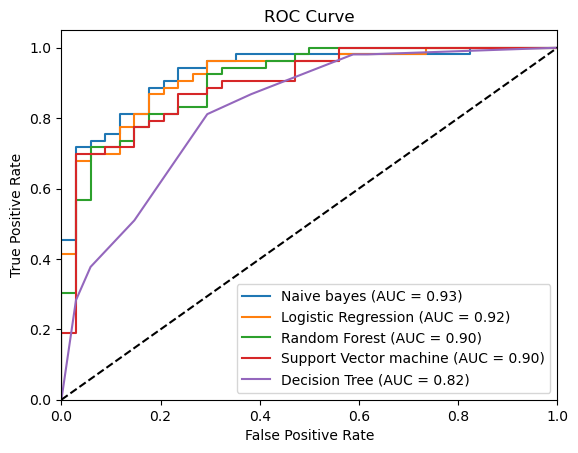

In [51]:
def plot_roc_curve(models, X_test, y_test):
    plt.figure()
    for model, name in models:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Example usage:
models = [(best_nb, 'Naive bayes'),(best_lr_model,'Logistic Regression'), (rf_clf_best, 'Random Forest'),(best_svm_model,'Support Vector machine'),(dt_clf_best,'Decision Tree')]
plot_roc_curve(models, X_test, y_test)

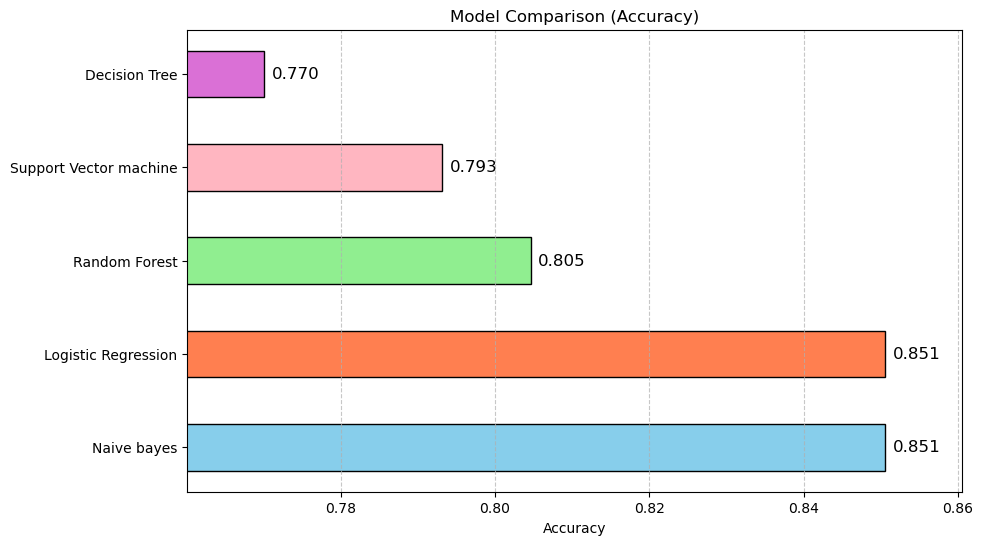

In [52]:
def plot_model_comparison(models, metric, X_test, y_test):
    scores = []
    model_names = []
    for model, name in models:
        if metric == 'accuracy':
            score = accuracy_score(y_test, model.predict(X_test))
        elif metric == 'f1':
            score = f1_score(y_test, model.predict(X_test), average='weighted')
        elif metric == 'auc':
            score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        scores.append(score)
        model_names.append(name)
    
     # Define different colors for each bar
    colors = ['skyblue','coral', 'lightgreen', 'lightpink','orchid']
    
      # Create the plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(model_names, scores, color=colors[:len(models)], edgecolor='black', height=0.5)
    
    # Add data labels
    for bar in bars:
        plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
                 f'{bar.get_width():.3f}', 
                 va='center', ha='left', color='black', fontsize=12)

    # Add grid lines
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Adjust x-axis limits to zoom in on the range of interest
    plt.xlim(min(scores) - 0.01, max(scores) + 0.01)
    
    # Set labels and title
    plt.xlabel(metric.capitalize())
    plt.title(f'Model Comparison ({metric.capitalize()})')
    plt.show()

models = [(best_nb, 'Naive bayes'),(best_lr_model,'Logistic Regression'), (rf_clf_best, 'Random Forest'),(best_svm_model,'Support Vector machine'),(dt_clf_best,'Decision Tree')]
plot_model_comparison(models, 'accuracy', X_test, y_test)


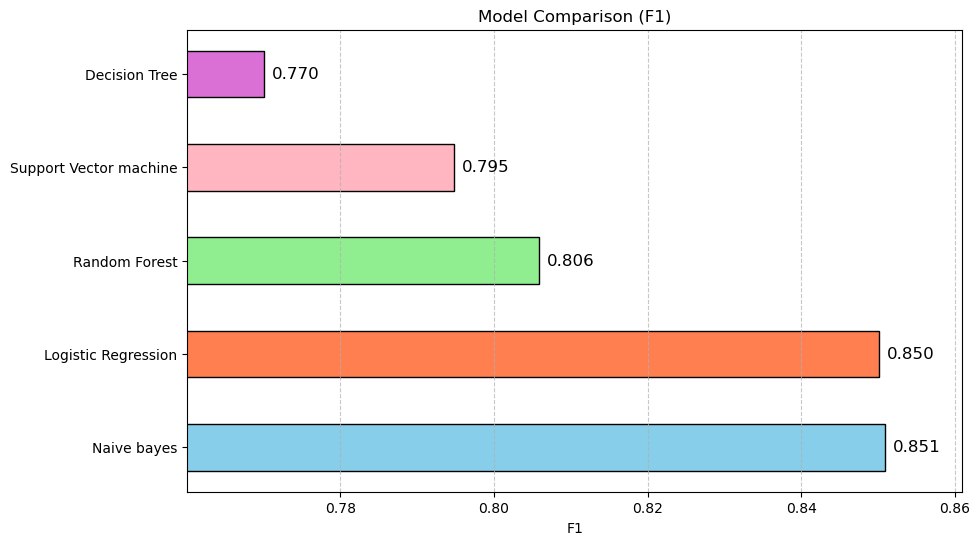

In [53]:
def plot_model_comparison(models, metric, X_test, y_test):
    scores = []
    model_names = []
    for model, name in models:
        if metric == 'accuracy':
            score = accuracy_score(y_test, model.predict(X_test))
        elif metric == 'f1':
            score = f1_score(y_test, model.predict(X_test), average='weighted')
        elif metric == 'auc':
            score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        scores.append(score)
        model_names.append(name)

    # Define different colors for each bar
    colors = ['skyblue','coral', 'lightgreen', 'lightpink','orchid']
    
      # Create the plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(model_names, scores, color=colors[:len(models)], edgecolor='black', height=0.5)
    
    # Add data labels
    for bar in bars:
        plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
                 f'{bar.get_width():.3f}', 
                 va='center', ha='left', color='black', fontsize=12)

    # Add grid lines
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Adjust x-axis limits to zoom in on the range of interest
    plt.xlim(min(scores) - 0.01, max(scores) + 0.01)
    
    # Set labels and title
    plt.xlabel(metric.capitalize())
    plt.title(f'Model Comparison ({metric.capitalize()})')
    plt.show()

models = [(best_nb, 'Naive bayes'),(best_lr_model,'Logistic Regression'), (rf_clf_best, 'Random Forest'),(best_svm_model,'Support Vector machine'),(dt_clf_best,'Decision Tree')]
plot_model_comparison(models, 'f1', X_test, y_test)


## Future work

This dataset is subset of UCI reposiotary, and has limited features than the data from the original and finding to see whether to improve model by feature engineering by bringing more features to the dataframe.

Since the focus on this iteration of the project is to find the best model to identify classes, all the features being used.To improve the robustness of the model further work on feature selection needed.

This project mostly focus on modeling with simple classifiers. Improve the model using other advanced classifiers to examine the model accuarcy.



#### ---------------------------------------------------------------------- END ----------------------------------------------------------------------